# Transformada Discreta de Fourier - Análisis de Señales en Tiempo Real

La transformada discreta de Fourier permite realizar el análisis espectral de una señal. Nos lleva del espacio de tiempo discreto al espacio de frecuencias, donde podemos obtener información sobre las componentes frecuenciales predominantes de una señal. El desarrollo de este módulo tendrá el siguiente orden:

1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal
2. Identificación Frecucencia Predominante en Señal Discreta
3. Identificación de Notas Musicales con Audio Real
4. Analisis Espectral en Tiempo  Real Usando Entrada de Micrófono

In [5]:
from IPython.display import Image
import numpy as np
import scipy.fftpack as fourier
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import winsound

%matplotlib inline

## 1. Definición Matemática de la Transformada Discreta de Fourier - Ejemplo en pequeña señal

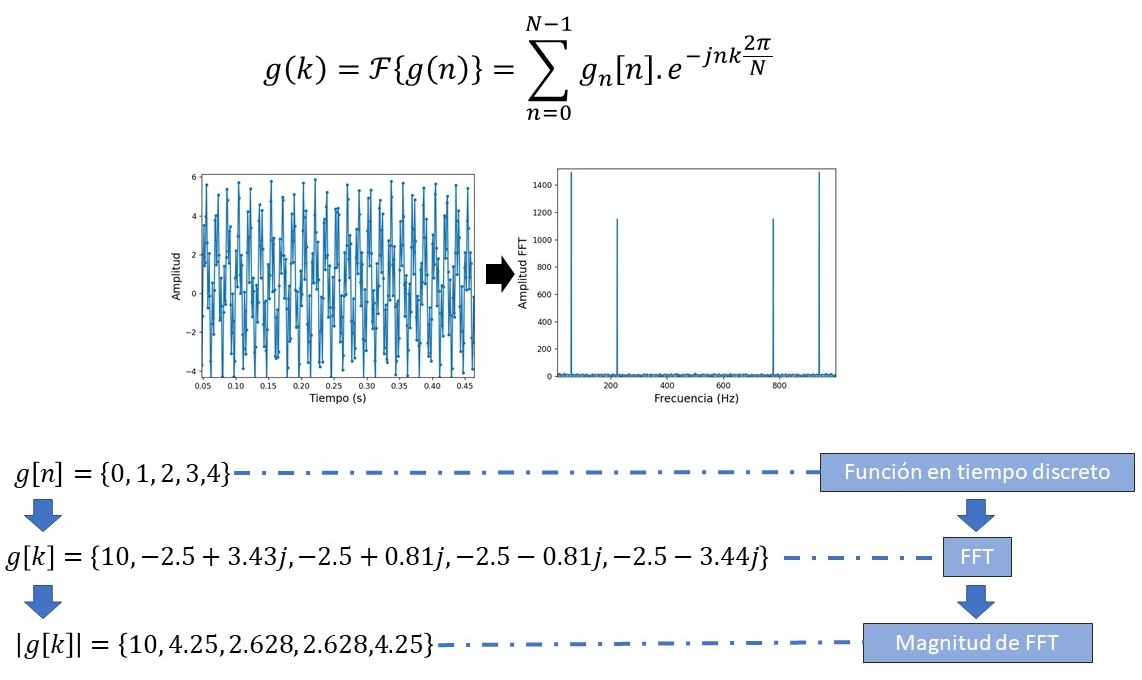

In [2]:
Image(filename='assets/FFT.jpg')

In [3]:
gn = [0, 1, 2, 3, 4] # Definimos una función en tiempo discreto
gk = fourier.fft(gn) # Calculamos la FFT
gk

array([10. -0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [4]:
M_gk = abs(gk)                   # Calculamos la Magnitud de la FFT
Ph_gk = np.angle(gk)             # Calculamos la Fase de la FFT
print('Magnitud: ', M_gk)
print('Angle: ',Ph_gk*180/np.pi)

Magnitud:  [10.          4.25325404  2.62865556  2.62865556  4.25325404]
Angle:  [  -0.  126.  162. -162. -126.]


## 2. Identificación Frecucencia Predominante en Señal Discreta

Crearemos una señal compuesta por dos ondas sinusoidales de 60 Hz y 223 Hz. Agregaremos ruido a la señal compuesta y luego mediante la FFT identificaremos las frecuencias predominantes de la señal sintética

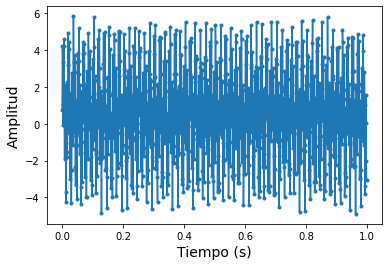

In [6]:
#%matplotlib notebook

Ts = 0.001                                       # Definimos un tiempo y frecuencia de muestreo
Fs=1/Ts
w1 = 2*np.pi*60                                  # Definimos una frecuencia de 60 Hz para la señal 1
w2 = 2*np.pi*223                                 # Definimos una frecuencia de 223 Hz para la señal 2

n = Ts*np.arange(0, 1000)
ruido = np.random.random(len(n))
x = 2*np.sin(w1*n)+3*np.sin(w2*n)+ruido        # Construimos una señal compuesta por la señal 1 y 2, y agregamos ruido


plt.plot(n,x,'.-')
plt.xlabel('Tiempo (s)', fontsize='14')
plt.ylabel('Amplitud', fontsize='14')
plt.show()

<IPython.core.display.Javascript object>


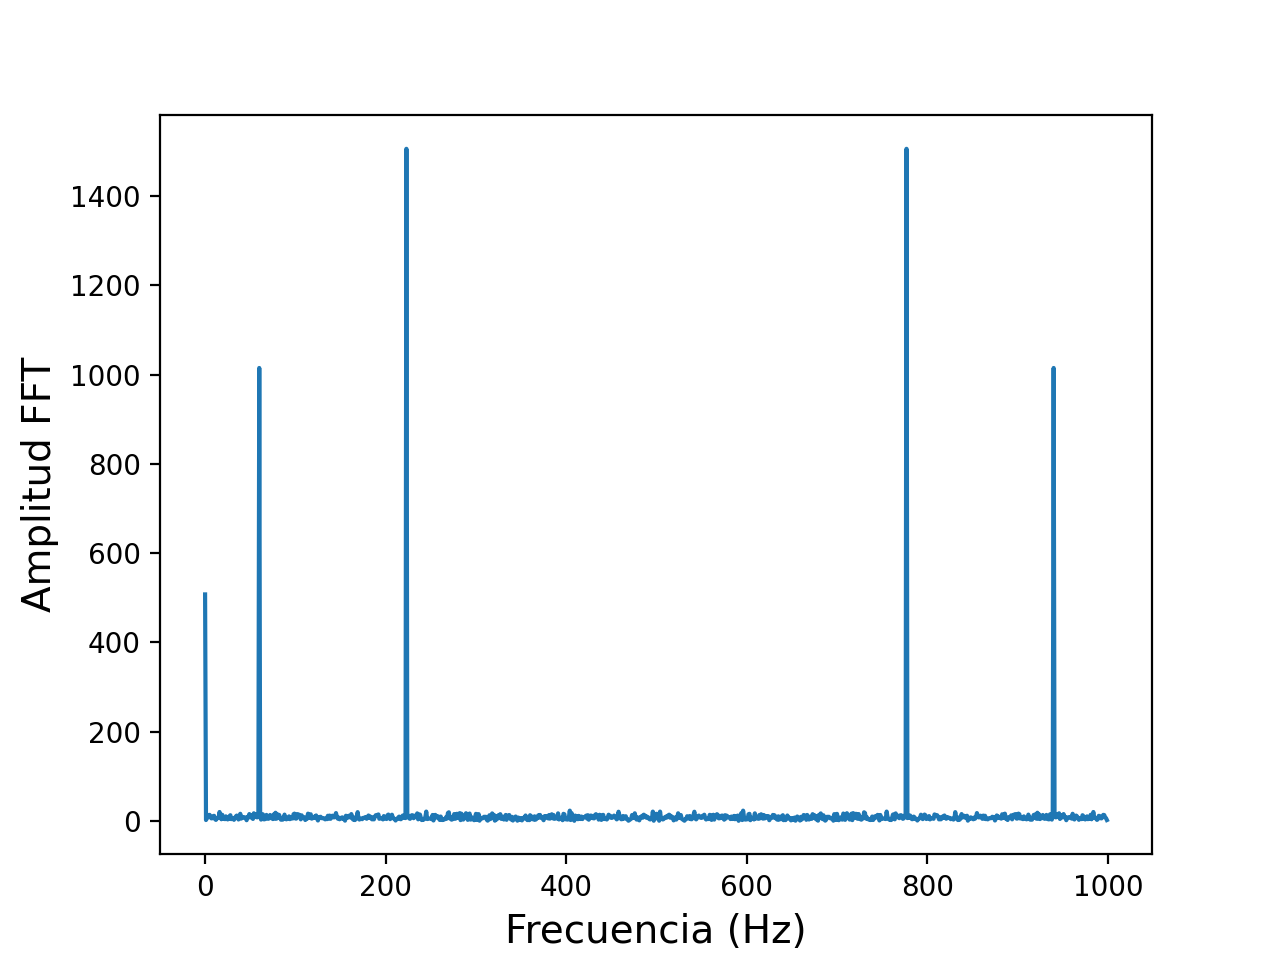

In [7]:
%matplotlib notebook

gk = fourier.fft(x)                             # Calculamos la FFT
M_gk = abs(gk)                                  # Calculamos la Magnitud de la FFT

F = Fs*np.arange(0, len(x))/len(x)              # Definimos el Vector de Frecuencias

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.show()

## 3. Identificación de Notas Musicales con Audio Real

* Cargaremos una grabación de audio .wav (He grabado notas musicales de una guitarra RE, MI, SOL)
* Obtendremos la variación temporal de la señal de audio
* Encontraremos la frecuencia dominante y la compararemos con los rangos de frecuencias de las notas musicales


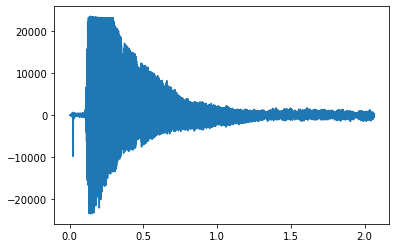

In [2]:
#%matplotlib notebook

filename='7.data/rec_SOL.wav'                                
winsound.PlaySound(filename, winsound.SND_FILENAME)   # Reproducimos el sonido que vamos a cargar

Fs, data = waves.read(filename)                       # Leemos el archivo de audio del directorio
Audio_m = data[:,0]              

L = len(Audio_m)                                      # Tomamos la longitud de la señal

n = np.arange(0,L)/Fs                                 # Definimos un vector de tiempo de la misma longitud de la señal

plt.plot(n,Audio_m)
plt.show()

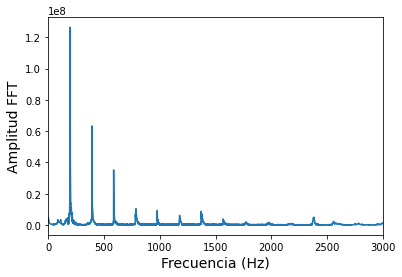

In [4]:
#%matplotlib notebook

gk = fourier.fft(Audio_m)                        # Calculamos la FFt de la señal de audio
M_gk = abs(gk)                                   # Tomamos la Magnitud de la FFT
M_gk = M_gk[0:L//2]                              # Tomamos la mitad de los datos (recordar la simetría de la transformada)

Ph_gk = np.angle(gk)
F = Fs*np.arange(0, L//2)/L

plt.plot(F, M_gk)
plt.xlabel('Frecuencia (Hz)', fontsize='14')
plt.ylabel('Amplitud FFT', fontsize='14')
plt.xlim(0,3000)
plt.show()

In [37]:
Posm = np.where(M_gk == np.max(M_gk))           # Encontramos la posición para la cual la Magnitud de FFT es máxima
F_fund = F[Posm]                                # Identificamos la Frecuencia asociada al valor del máximo de la Magnitud de FFT

if F_fund > 135 and F_fund < 155:                   # Rango de frecuencias para nota RE
    print("La nota es RE, con frecuencia: ",F_fund)
elif F_fund > 190 and F_fund < 210:                   # Rango de frecuencias para nota SOL
    print("La nota es SOL, con frecuencia: ",F_fund)
elif F_fund > 235 and F_fund < 255:                     # Rango de frecuencias para nota SI
    print("La nota es SI, con frecuencia: ",F_fund)
elif F_fund > 320 and F_fund < 340:                   # Rango de frecuencias para nota MI
    print("La nota es MI, con frecuencia: ",F_fund)

La nota es SOL, con frecuencia:  [195.76740506]


## 4. Analisis Espectral en Tiempo Real Usando Entrada de Micrófono

* Instalaremos PyAudio para la adquicisión de audio en tiempo real
* Leemos la señal del micrófono en paquetes de tamaño especificado por el parámetro FRAMES y con frecuencia Fs
* Calculamos la FFT para cada paquete leido, mostramos la gráfica temporal y el espectro de la señal
* Calculamos la Frecuencia Dominante para cada paquete leido

In [8]:
!pip install PyAudio

In [6]:
import matplotlib
import pyaudio as pa 
import struct 

matplotlib.use('TkAgg')
#%matplotlib notebook

FRAMES = 1024*8                                   # Tamaño del paquete a procesar
FORMAT = pa.paInt16                               # Formato de lectura INT 16 bits
CHANNELS = 1
Fs = 44100                                        # Frecuencia de muestreo típica para audio

p = pa.PyAudio()

stream = p.open(                                  # Abrimos el canal de audio con los parámeteros de configuración
    format = FORMAT,
    channels = CHANNELS,
    rate = Fs,
    input=True,
    output=True,
    frames_per_buffer=FRAMES
)

## Creamos una gráfica con 2 subplots y configuramos los ejes

fig, (ax,ax1) = plt.subplots(2)

x_audio = np.arange(0,FRAMES,1)
x_fft = np.linspace(0, Fs, FRAMES)

line, = ax.plot(x_audio, np.random.rand(FRAMES),'r')
line_fft, = ax1.semilogx(x_fft, np.random.rand(FRAMES), 'b')

ax.set_ylim(-32500,32500)
ax.ser_xlim = (0,FRAMES)

Fmin = 1
Fmax = 5000
ax1.set_xlim(Fmin,Fmax)

fig.show()


F = (Fs/FRAMES)*np.arange(0,FRAMES//2)                 # Creamos el vector de frecuencia para encontrar la frecuencia dominante

while True:
    
    data = stream.read(FRAMES)                         # Leemos paquetes de longitud FRAMES
    dataInt = struct.unpack(str(FRAMES) + 'h', data)   # Convertimos los datos que se encuentran empaquetados en bytes
    
    line.set_ydata(dataInt)                            # Asignamos los datos a la curva de la variación temporal
    
    M_gk = abs(fourier.fft(dataInt)/FRAMES)            # Calculamos la FFT y la Magnitud de la FFT del paqute de datos

    
    ax1.set_ylim(0,np.max(M_gk+10)) 
    line_fft.set_ydata(M_gk)                           # Asigmanos la Magnitud de la FFT a la curva del espectro 
    
    M_gk = M_gk[0:FRAMES//2]                           # Tomamos la mitad del espectro para encontrar la Frecuencia Dominante
    Posm = np.where(M_gk == np.max(M_gk))
    F_fund = F[Posm]                                   # Encontramos la frecuencia que corresponde con el máximo de M_gk
    
    print(int(F_fund))                                 # Imprimimos el valor de la frecuencia dominante

    fig.canvas.draw()
    fig.canvas.flush_events()

452
226
662
430
452
522
484
506
522
511
312
452
441
678
500
436
468
312
441
425
721
635
635
452
452
452
452
769
576
629
441
549
554
586
129
441
581
516
635
737
721
721
430
592
586
419
366
629
247
489
134
516
543
576
462
236
452
452
177
549
715
506
414
129
629
419
398
549
209
554
532
430
430
678
457
565
629
635
570
414
436
441
678
441
473
500
317
640
236
236
236
91
452
462
559
457
403
586
193
635
532
629
452
452
204
199
371
441
522
522
129
446
549
597
446
419
629
425
457
425
629
129
452
495
360
608
796
651
613
586
543
495
506
183
441
452
193
419
586
419
414
559
253
236
635
231
419
441
183
344
183
452
1512
1512
1501
1523
1539
1523
1512
1523
1528
1545
1539
1545
1550
452
516
516
446
446
177
452
419
527
522
500
317
527
414
430
441
419
532
129
129
452
452
452
452
274
527
586
527
629
721
683
500
414
414
441
446
586
549
629
602
328
715
597
236
296
366
436
419
586
446
258
516
645
414
172
629
242
129
236
446
236
177
452
263
446
457
446
446
436
193
425
247
301
678
236
452
516
559
635
635
635
430


TclError: 